### GOAL
The main purpose of this notebook is:  
1- Make an analysis of our variables from different perspectives.  
2- Confirm that our dataset has fair information based on our business knowledge.  
3- Understand correlation between variables.  
4- if it is necessary create new variables or modify some information like nulls.  
5- Understand better the information to implement the right models.

In [1]:
import datetime as dt
import math # funciones matematicas
from typing import Tuple, List, Dict, Set
from datetime import datetime # fechas
import numpy as np # funciones matemáticas para operar con vectores o matrices
import random # generador de datos aleatorios
from matplotlib import pyplot as plt # gráficos
%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # gráficos 3D
from matplotlib import cm # mapa de colores
import seaborn as sns # gráficos más avanzados
import pandas as pd # analisis y manipulación y filtrado de datos, creación de data.frames(tablas)
import scipy.stats # Machine learning
import requests # Apis
import json
import scipy.stats # estadística y distribuciones de probabilidad
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose ## Descomposición
from statsmodels.tsa.arima_model import ARIMA
import geopandas

In [2]:
df = pd.read_csv('/root/TFM/Data/df_features')

In [3]:
df['Review_Date'] = df['Review_Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [4]:
df['Price'].fillna(0)

0         101.0
1         101.0
2         101.0
3         101.0
4         101.0
          ...  
515733     81.0
515734     81.0
515735     81.0
515736     81.0
515737     81.0
Name: Price, Length: 515738, dtype: float64

In [5]:
df['Reservation_ADR'] = df['Price'] * df['Length_N']

In [6]:
df['Reservation_ADR'].fillna(0)

0         606.0
1         404.0
2         303.0
3         303.0
4         202.0
          ...  
515733    405.0
515734    162.0
515735    324.0
515736    243.0
515737    162.0
Name: Reservation_ADR, Length: 515738, dtype: float64

### Variable definition: 
Includes variables from the dataset and new ones created in order to feed our dataset with more relevant information.

In [7]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'Diff', 'Review_Month',
       'Review_Year', 'Country', 'City', 'Pet', 'Purpose', 'Whom', 'Room',
       'Length', 'Device', 'Room_Recode', 'Nationality_Recode',
       'Length_Recode', 'Close_Landmarks', 'Dist_Center', 'Dist_Airport',
       'Dist_Train', 'Price', 'Stars', 'Length_N', 'Reservation_ADR'],
      dtype='object')

1-Hotel_Address: Address of hotel. (type: String)  
2-Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there. (type: integer)  
3-Review_Date: Date when reviewer posted the corresponding review. (type: Date)  
4-Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.(type: float)  
5-Hotel_Name: Name of Hotel. (type: String)  
6-Reviewer_Nationality: Nationality of Reviewer. (type: String)  
7-Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'. (type: string)  
8-Total_Number_of_Reviews: Total number of valid reviews the hotel has. (type: integer)  
9-Review_Total_Negative_Word_Counts: Total number of words in the negative review.(type: integer)  
10-Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'. (type: string)  
11-Review_Total_Positive_Word_Counts: Total number of words in the positive review.(type: integer)  
12-Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past. (type: integer)  
13-Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience.(type: float)  
14-days_since_review: Duration between the review date and scrape date.(type: integer)  
15-lat: Latitude of the hotel.(type: float)  
16-lng: longtitude of the hotel. (type: float)  
17- Diff: This variable was not included in the original dataset. Difference betwee Avrage Score and Customer review score (type: float)   
18- Review_Month: month of the review score transformed into a number (type: integer)  
19- Review_Year: year of the review score transformed into a number (type: integer)  
20- Country: Country where hotel is located (type: string)  
21- City: City where hotel is located (type: string)  
22- Pet: Travell with pet  (type: string)  
23- Purpose: reason for travelling (type: string)  
24- Whom: Customer profile. (type: string)  
25- Room: Room type. (type: String)  
26- Length: it represents the number of nights stayed by the customer. (type: String)  
27- Device: Reservation made by mobile or desktop. (type: String)  
28- Room_Recode: Room type clusterized in groups. This ratio was not included in the original dataset. (type: String)  
29- Nationality_Recode: Customer nationality clusterized in groups based on those world regions that use to provide similar review scores. (type: String)  
30- Length_Recode: It represents the number of nights stayed by the customer clusterized in gropus from 1 to 9 nights.(type: String)  
31- Close_Landmarks: This variable was not included in the original dataset. It represent how many of the top 10 landmarks of the city are close to the hotel. Location is key and cusomers, travelling for leisure, not only find important to be close to a specific landmark but also to a multiple landamarks. We take as a reference the center point and closest point to these top 10 landamarks. (type: float)  
32- Dist_Center: This variable was not included in the original dataset. Distance from hotel to city center (type: float)  
33- Dist_Airport: This variable was not included in the original dataset. Distance from hotel to main Airport (type: float)  
34- Dist_Train: This variable was not included in the original dataset. Distance from hotel to main train station (type: float)
35- Price: This variable was not included in the original dataset. We do not know  the real price of the reservation. Based on scrapping process we extract a reference price provided by Booking.com. (type: float)  
36- Stars: number of hotel stars. (type: Strings)  
37- Lenght_N: it represents the number of nights stayed by the customer. (type: String)  
38- Reservation_ADR: This variable was not included in the original dataset. It represents the total cost of the reservation. We created this ratio because it is a clear influencer during the evaluation process in terms of value for money. (type: float) 

In [8]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Nationality_Recode,Length_Recode,Close_Landmarks,Dist_Center,Dist_Airport,Dist_Train,Price,Stars,Length_N,Reservation_ADR
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,Eastern Europe,Stayed 6 nights,1.0,2024.205617,11533.73411,2324.804446,101.0,hotel de 4 estrellas,6.0,606.0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,UK & Ireland,Stayed 4 nights,1.0,2024.205617,11533.73411,2324.804446,101.0,hotel de 4 estrellas,4.0,404.0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,Oceania,Stayed 3 nights,1.0,2024.205617,11533.73411,2324.804446,101.0,hotel de 4 estrellas,3.0,303.0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,UK & Ireland,Stayed 3 nights,1.0,2024.205617,11533.73411,2324.804446,101.0,hotel de 4 estrellas,3.0,303.0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,Oceania,Stayed 2 nights,1.0,2024.205617,11533.73411,2324.804446,101.0,hotel de 4 estrellas,2.0,202.0


In [9]:
df.shape

(515738, 38)

In [10]:
df.count()

Hotel_Address                                 515738
Additional_Number_of_Scoring                  515738
Review_Date                                   515738
Average_Score                                 515738
Hotel_Name                                    515738
Reviewer_Nationality                          515738
Negative_Review                               515738
Review_Total_Negative_Word_Counts             515738
Total_Number_of_Reviews                       515738
Positive_Review                               515738
Review_Total_Positive_Word_Counts             515738
Total_Number_of_Reviews_Reviewer_Has_Given    515738
Reviewer_Score                                515738
days_since_review                             515738
lat                                           512470
lng                                           512470
Diff                                          515738
Review_Month                                  515738
Review_Year                                   

### UNIVARIABLE ANALYSIS: Quantitative metrics
We want to understand the distribution and the impact of the outlayers. For instance, comparing difference between means and medians.

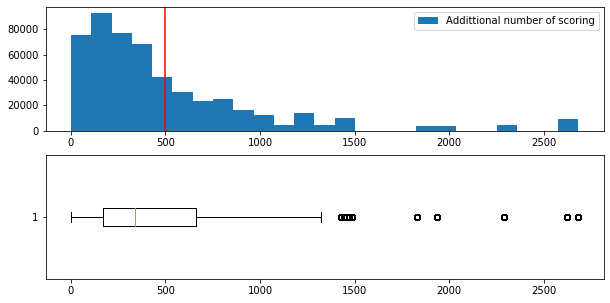

In [11]:
# Additional Number of Scoring: Some hotels have a big number of reviews apart from those included in the Reviewer score 
# column. It moves our mean to the right in relation to our median.

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Additional_Number_of_Scoring'], bins = 25, label = 'Addittional number of scoring')
ax[0].axvline(df['Additional_Number_of_Scoring'].mean(), color = 'r')
ax[1].boxplot(df['Additional_Number_of_Scoring'],vert = False)
ax[0].legend()

#### Most Hotel Average Scores are between 8 and 9.

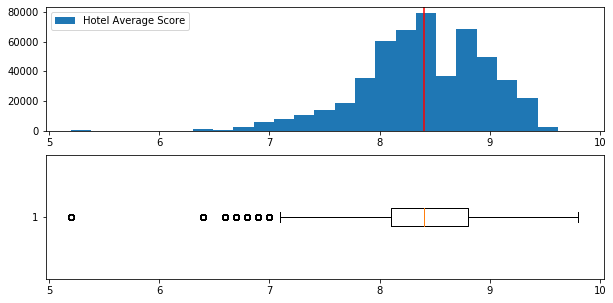

In [94]:
fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Average_Score'], bins = 25, label = 'Hotel Average Score')
ax[0].axvline(df['Average_Score'].mean(), color = 'r')
ax[1].boxplot(df['Average_Score'],vert = False)
ax[0].legend()

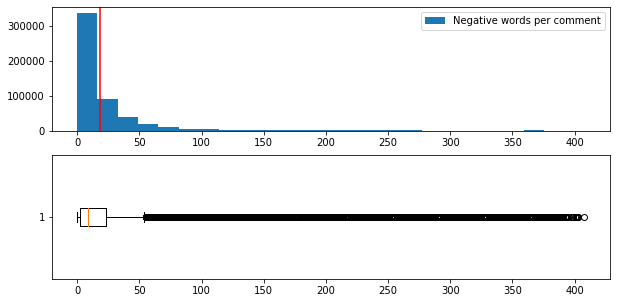

In [13]:
#Review Total Negative Word Counts: some negative reviews move the mean to the right

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Review_Total_Negative_Word_Counts'], bins = 25, label = 'Negative words per comment')
ax[0].axvline(df['Review_Total_Negative_Word_Counts'].mean(), color = 'r')
ax[1].boxplot(df['Review_Total_Negative_Word_Counts'],vert = False)
ax[0].legend()

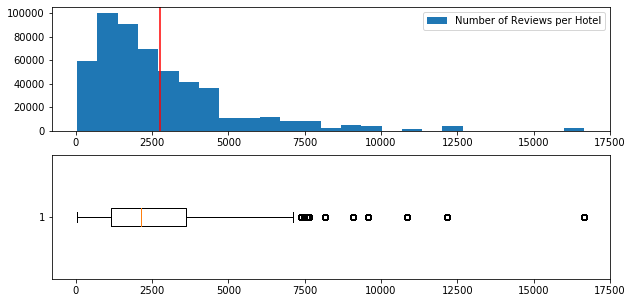

In [14]:
# Total Number of Reviews per Hotel. Some hotels have a big number of reviews. It moves our mean to the right in relation to 
# our median.

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Total_Number_of_Reviews'], bins = 25, label = 'Number of Reviews per Hotel')
ax[0].axvline(df['Total_Number_of_Reviews'].mean(), color = 'r')
ax[1].boxplot(df['Total_Number_of_Reviews'],vert = False)
ax[0].legend()

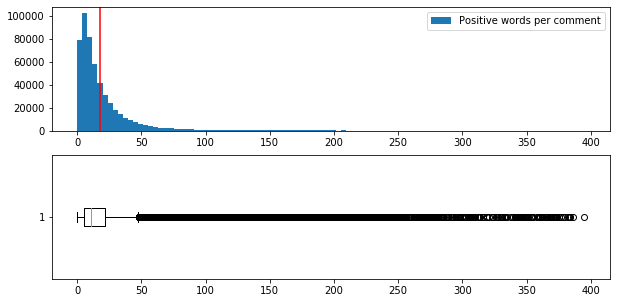

In [15]:
# Review Total Positive Word Counts

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Review_Total_Positive_Word_Counts'], bins = 100, label = 'Positive words per comment')
ax[0].axvline(df['Review_Total_Positive_Word_Counts'].mean(), color = 'r')
ax[1].boxplot(df['Review_Total_Positive_Word_Counts'],vert = False)
ax[0].legend()

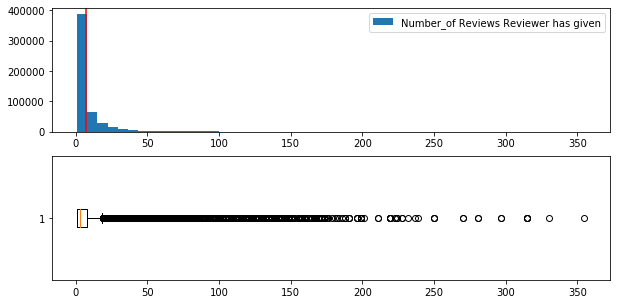

In [16]:
# Total Number of Reviews Reviewer Has Given

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Total_Number_of_Reviews_Reviewer_Has_Given'], bins = 50, label = 'Number_of Reviews Reviewer has given')
ax[0].axvline(df['Total_Number_of_Reviews_Reviewer_Has_Given'].mean(), color = 'r')
ax[1].boxplot(df['Total_Number_of_Reviews_Reviewer_Has_Given'],vert = False)
ax[0].legend()


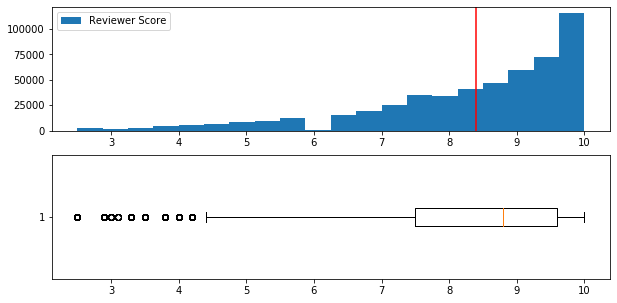

In [17]:
# Reviewer Score

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Reviewer_Score'], bins = 20, label = 'Reviewer Score')
ax[0].axvline(df['Reviewer_Score'].mean(), color = 'r')
ax[1].boxplot(df['Reviewer_Score'],vert = False)
ax[0].legend()

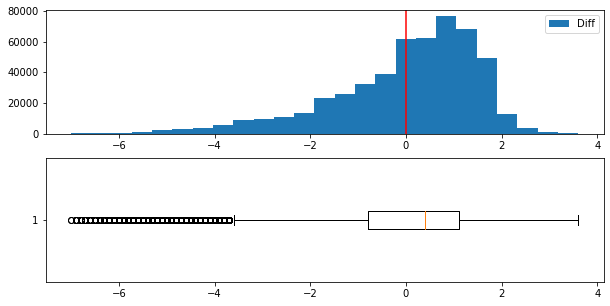

In [18]:
# Diff: Most values are positive and will help hotel to increase its average score. However, there is
# a long cue in the negative numbers because some reviews are very negative moving the mean to the left.

fig, ax=plt.subplots(2, 1, figsize=(10, 5))
ax[0].hist(df['Diff'], bins = 25, label = 'Diff')
ax[0].axvline(df['Diff'].mean(), color = 'r')
ax[1].boxplot(df['Diff'],vert = False)
ax[0].legend()

/root/anaconda3/envs/masterds/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/root/anaconda3/envs/masterds/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


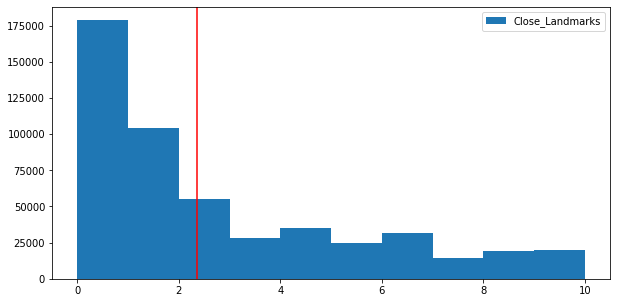

In [19]:
# Distance to Close_Landmarks

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Close_Landmarks'], bins = 10, label = 'Close_Landmarks')
ax.axvline(df['Close_Landmarks'].mean(), color = 'r')
ax.legend()

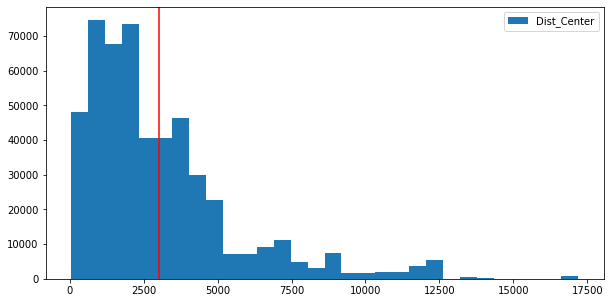

In [20]:
# Distance to City center

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Dist_Center'], bins = 30, label = 'Dist_Center')
ax.axvline(df['Dist_Center'].mean(), color = 'r')
ax.legend()

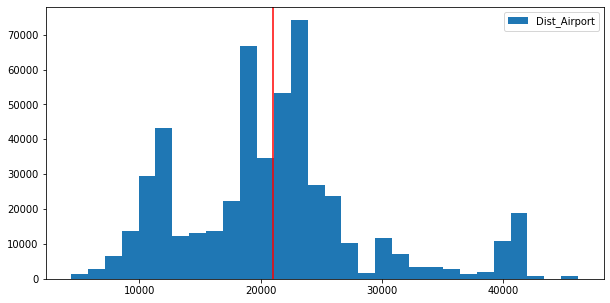

In [21]:
# Distance to Airport

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Dist_Airport'], bins = 30, label = 'Dist_Airport')
ax.axvline(df['Dist_Airport'].mean(), color = 'r')
ax.legend()

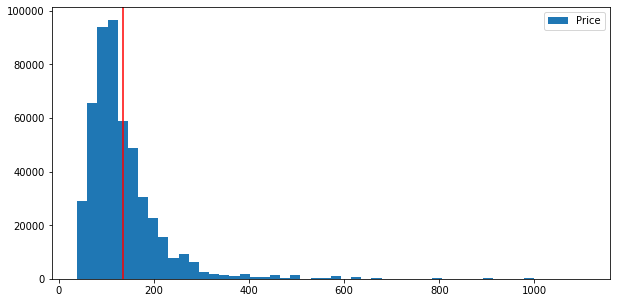

In [22]:
# Price

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Price'], bins = 50, label = 'Price')
ax.axvline(df['Price'].mean(), color = 'r')
ax.legend()

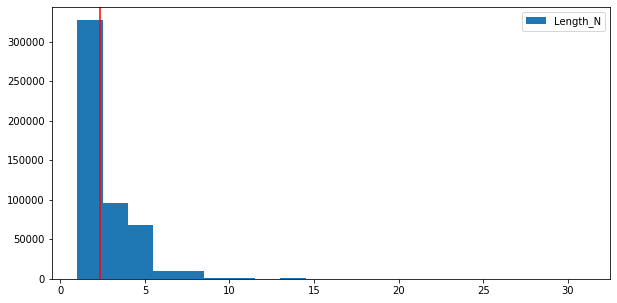

In [23]:
# Length_N

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Length_N'], bins = 20, label = 'Length_N')
ax.axvline(df['Length_N'].mean(), color = 'r')
ax.legend()

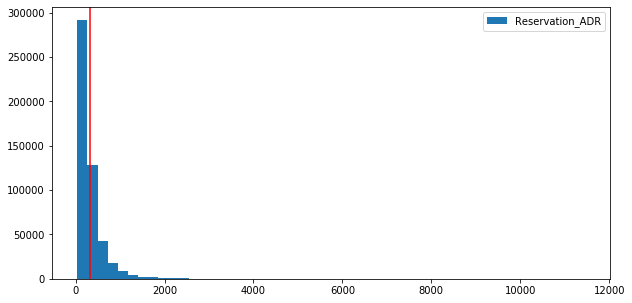

In [24]:
# Reservation ADR 

fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['Reservation_ADR'], bins = 50, label = 'Reservation_ADR')
ax.axvline(df['Reservation_ADR'].mean(), color = 'r')
ax.legend()

### UNIVARIABLE ANALYSIS: Qualitative metrics

We want to undersand what qualitative characteristics are the most frequent in our reservation. We conclude that hotels located in London generate the same number of customer reviews than the rest of the 5 cities together. Most of the reservations were made by couples & solo travellers, from UK & Ireland, that use to be between 1 and 3 nights in a standard or deluxe room.

In [25]:
num = df.Country.value_counts()
count_country= pd.DataFrame(num)

num1 = df.City.value_counts()
count_city= pd.DataFrame(num1)

pets_count = df.Pet.value_counts()
purpouse_count = df.Purpose.value_counts()
whom_counts = df.Whom.value_counts()
Room_type_counts = df.Room_Recode.value_counts().head()
LOS = df.Length.value_counts().head(7)
device_counts = df.Device.value_counts()
Reviewer_Nationality_counts = df.Nationality_Recode.value_counts().head()

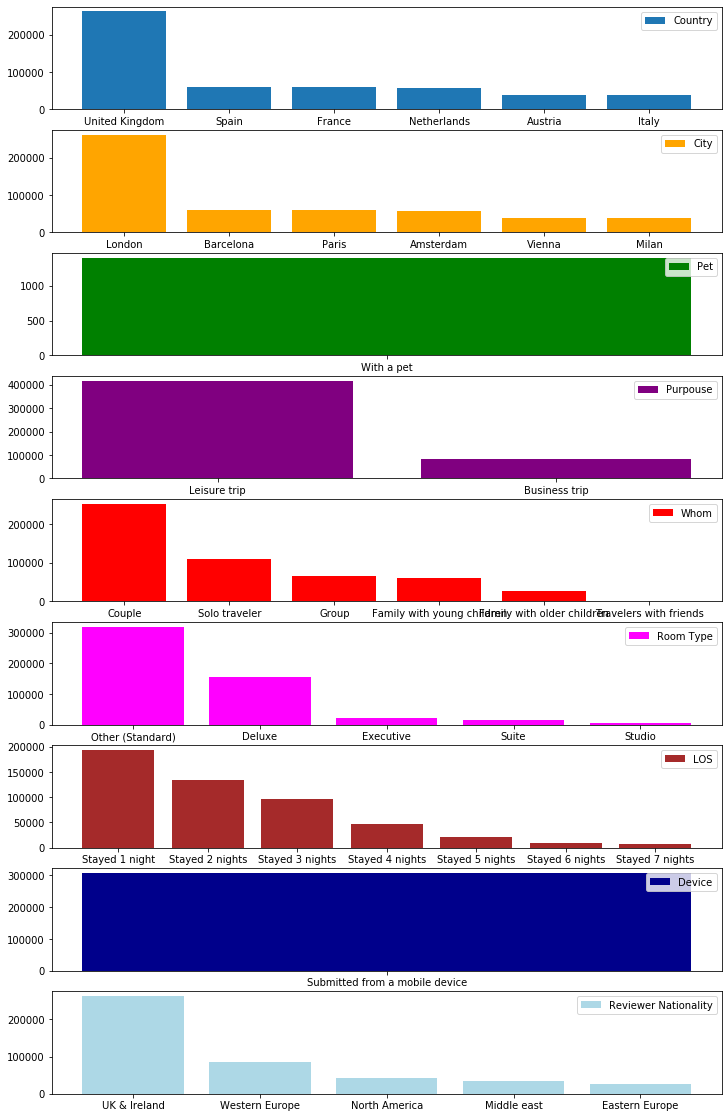

In [26]:
fig, ax = plt.subplots(9, 1, figsize = (12, 20))
ax[0].bar(count_country.index, count_country['Country'], label = 'Country')
ax[1].bar(count_city.index, count_city['City'], color='orange', label = 'City')
ax[2].bar(df['Pet'].value_counts().index.values, pets_count, color = 'green', label = 'Pet')
ax[3].bar(df['Purpose'].value_counts().index.values, purpouse_count, color = 'purple', label = 'Purpouse')
ax[4].bar(df['Whom'].value_counts().index.values, whom_counts, color = 'red', label = 'Whom')
ax[5].bar(Room_type_counts.index.values, Room_type_counts, color = 'magenta', label = 'Room Type')
ax[6].bar(LOS.index.values, LOS, color = 'brown', label = 'LOS')
ax[7].bar(device_counts.index.values, device_counts, color = 'darkblue', label = 'Device')
ax[8].bar(Reviewer_Nationality_counts.index.values, Reviewer_Nationality_counts, color = 'lightblue', label = 'Reviewer Nationality')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()
ax[6].legend()
ax[7].legend()
ax[8].legend()

### MULTIVARIABLE ANALISYS - Quantitative & Qualitative metrics

#### Quantitative:  
'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score',  'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Diff', 'Review_Month', 'Review_Year',  
'days_since_review', 'lat', 'lng', 'Close_Landmarks', 'Dist_Center', 'Dist_Airport','Dist_Train',  
'Price', 'Length_N', 'Reservation_ ADR'  

#### Qualitative:  
'Hotel_Address', 'Hotel_Name', 'Review_Date', 'Negative_Review', 'Positive_Review',  
'Country', 'City','Pet', 'Purpose', 'Whom', 'Room_Recode',  'Length', 'Length_Recode',  
'Nationality_Recode', 'Device', , 'Review_Year', 'Stars'


### Which are the variables with the highest correlation?  
#### 1- Hotels with more reviews uses to get a higher additional number of reviews.    

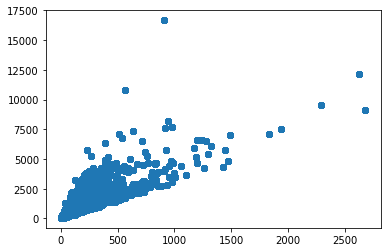

In [27]:
plt.scatter(df['Additional_Number_of_Scoring'], df['Total_Number_of_Reviews'])

In [89]:
print('Cor Reviewer Score & Difference Score is', np.corrcoef(df['Reviewer_Score'], df['Diff']))

Cor Reviewer Score & Difference Score is [[1.        0.9424161]
 [0.9424161 1.       ]]


#### 2- The highest is the reviewer Score, highest is the difference between Reviewer_Score and Average_Score.

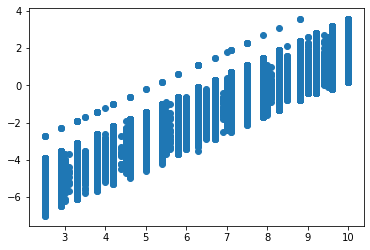

In [28]:
plt.scatter(df['Reviewer_Score'], df['Diff'])

In [90]:
print('Cor Additional number of scoring & Total number of reviews is', np.corrcoef(df['Additional_Number_of_Scoring'], df['Total_Number_of_Reviews']))

Cor Additional number of scoring & Total number of reviews is [[1.         0.82488378]
 [0.82488378 1.        ]]


#### 3- The closest is the hotel to the city center the closest is the hotel to the train station.

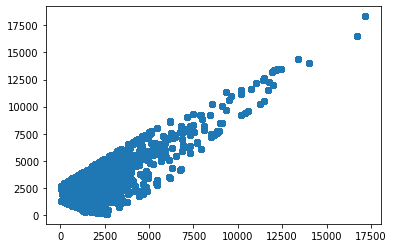

In [91]:
plt.scatter(df['Dist_Center'], df['Dist_Train'])

#### 4- Those hotels closer to the city center generates booking with higher Reservation_ADR

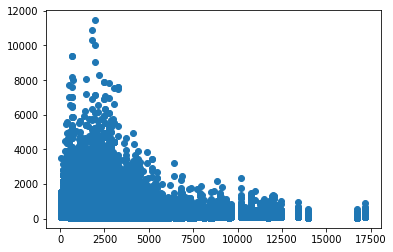

In [87]:
plt.scatter(df['Dist_Center'], df['Reservation_ADR'])

#### 5- Reservations with more number of nights use to be more expensive.  

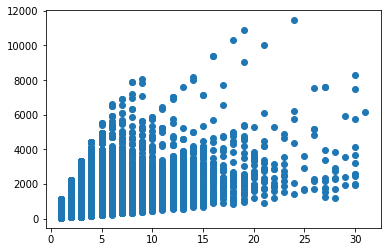

In [92]:
plt.scatter(df['Length_N'], df['Reservation_ADR'])

#### Let's take a look to the rest of quantitative variables with lower correlation. 

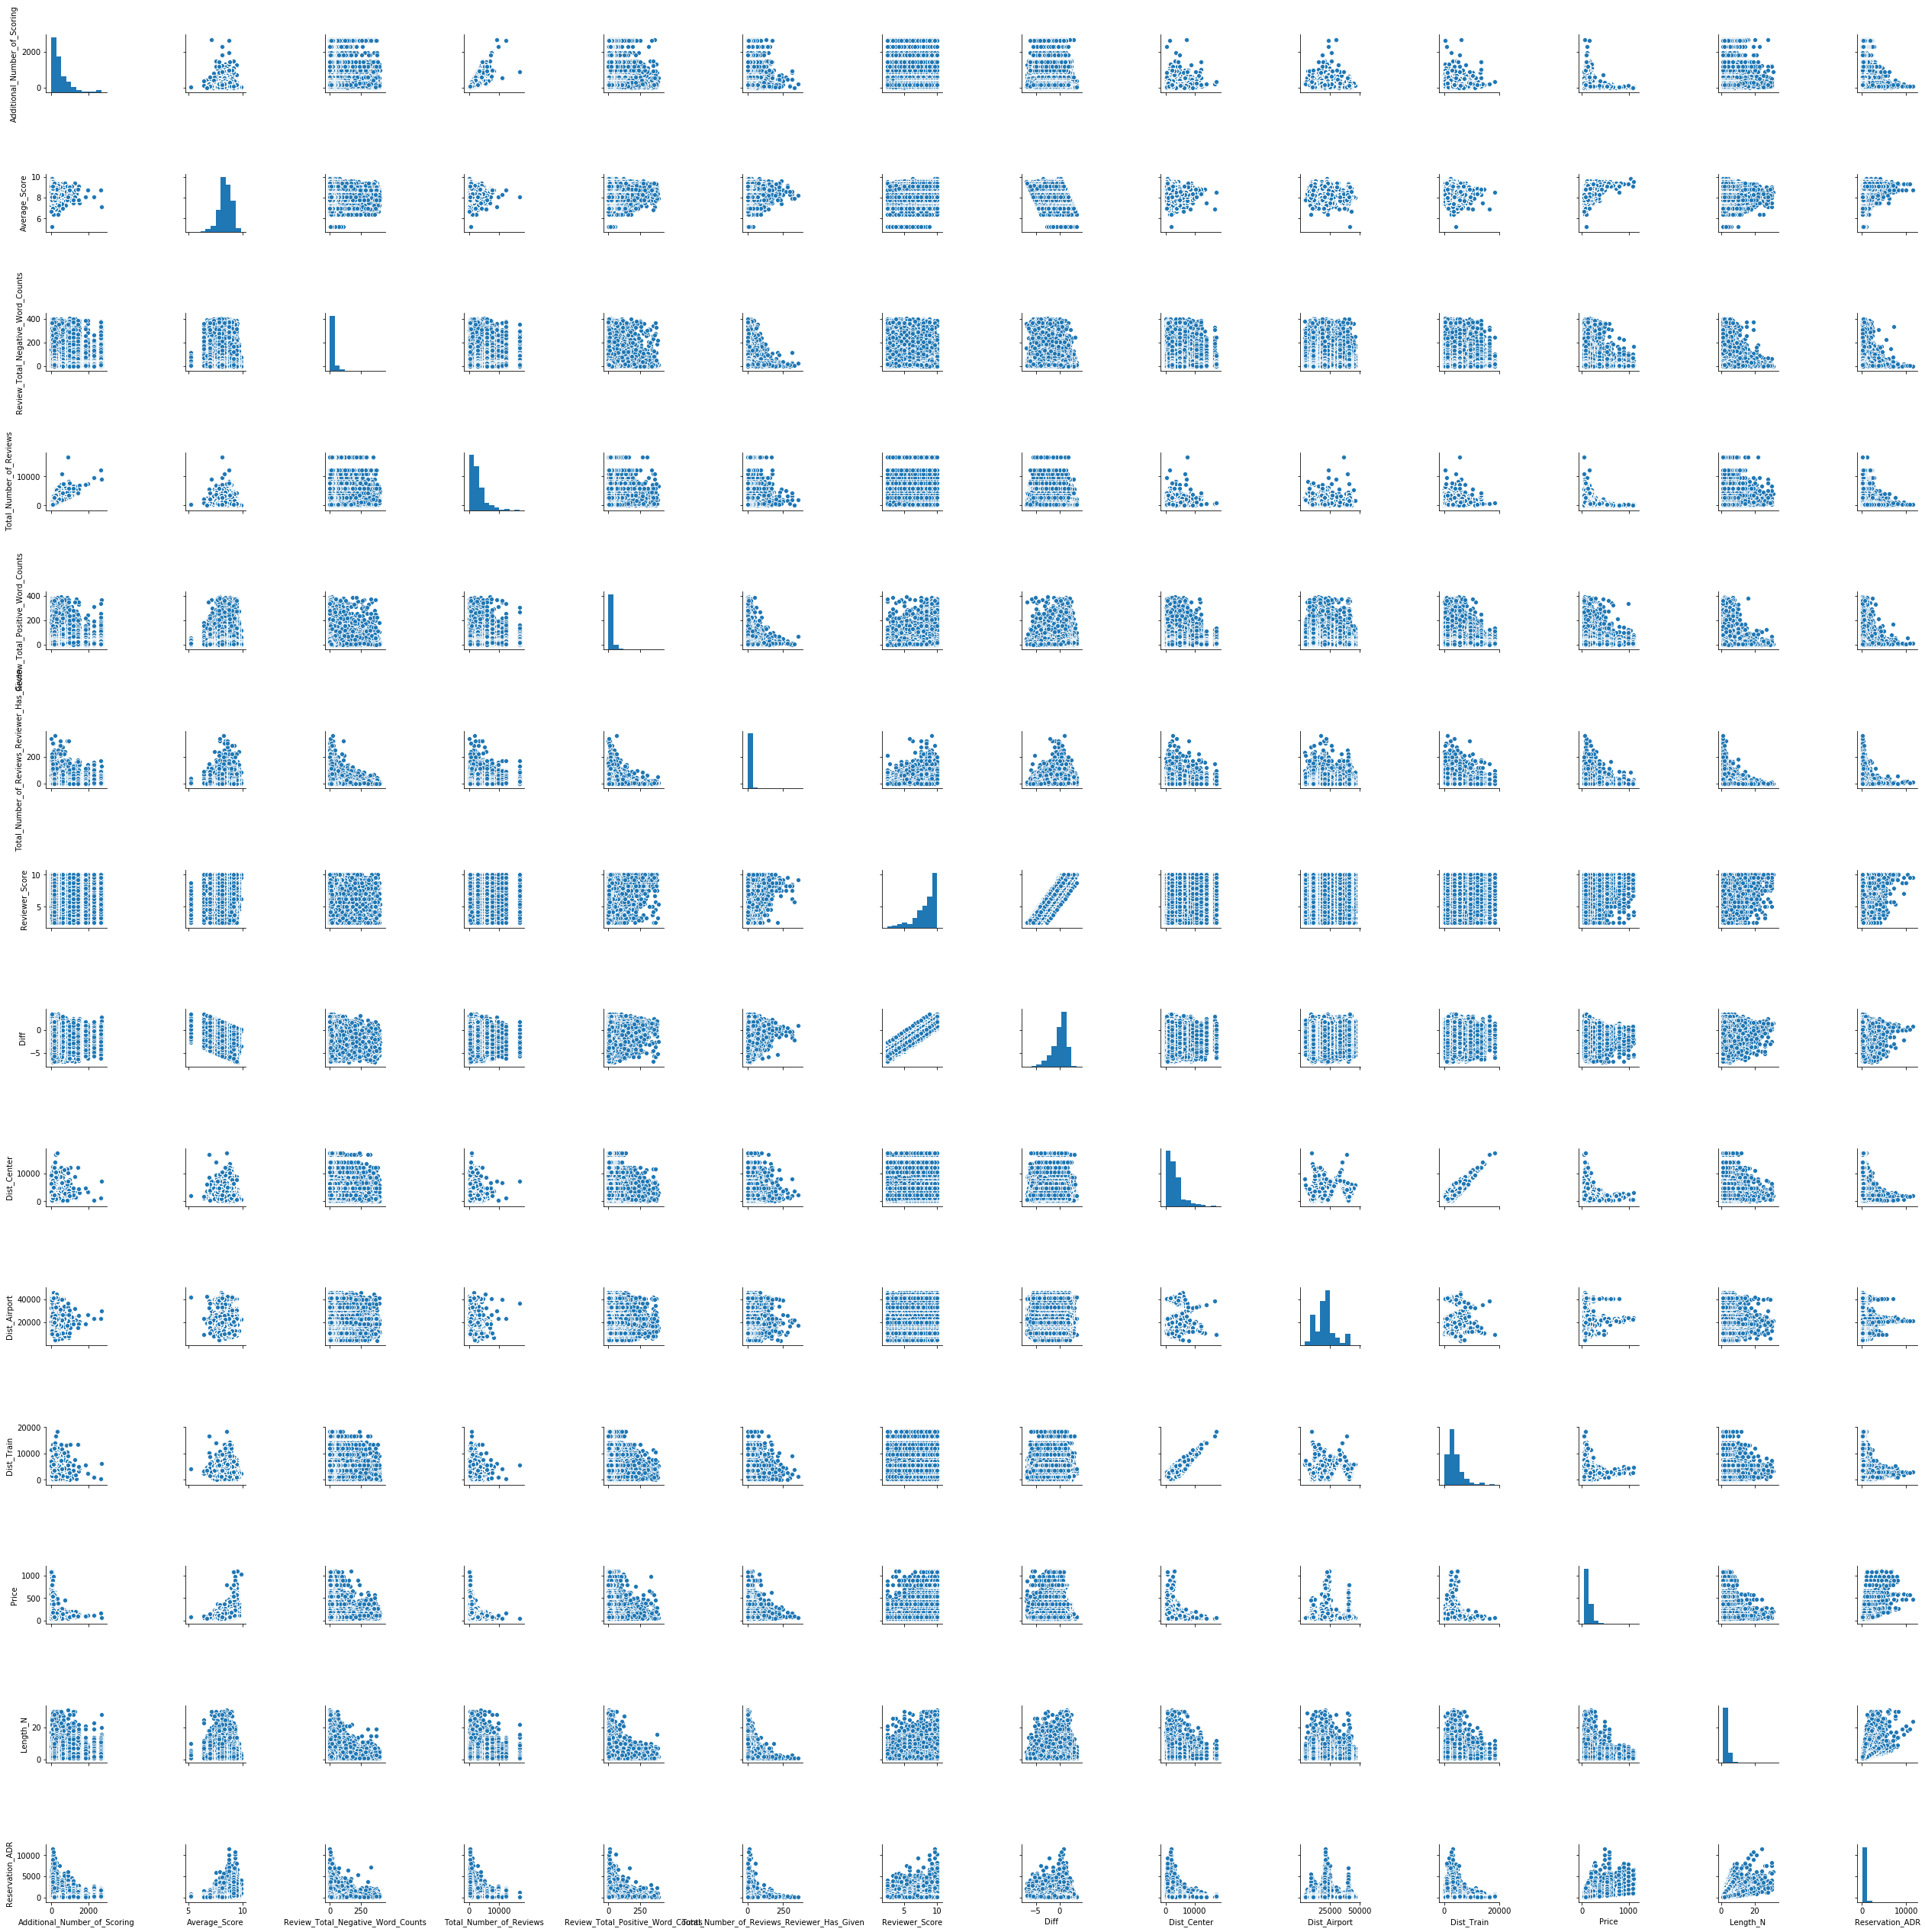

In [32]:
sns.pairplot(df.drop(columns=['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
                              'Positive_Review', 'lat', 'lng', 'Length', 'Review_Month', 'Review_Year', 'Country', 'City',
                             'Pet', 'Purpose', 'Whom', 'Room','Room_Recode', 'Length_Recode', 'Nationality_Recode', 'Device', 'Close_Landmarks', 'Stars']))

### Is there any relation between hotel Average_Score and negative or positive number of words of customer reviews?

Those hotels with lower average score have reviews with more negative words.  
Those hotels with higher average score have reviews with more positive words.  
Check below grid and graph.

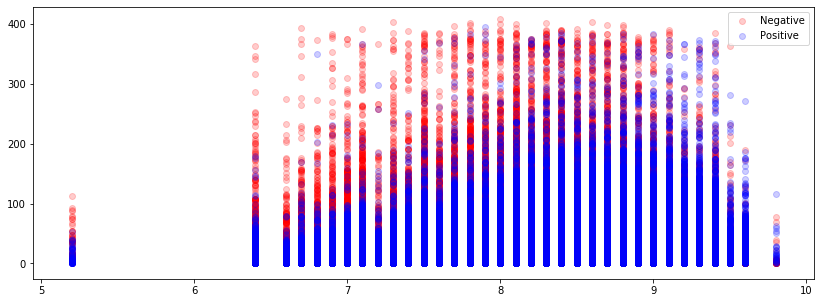

In [33]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
ax.scatter(df['Average_Score'], df['Review_Total_Negative_Word_Counts'], c = 'r', alpha = .2, label = 'Negative')
ax.scatter(df['Average_Score'], df['Review_Total_Positive_Word_Counts'], c = 'b', alpha = .2, label = 'Positive')
ax.legend()

In [34]:
df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']].groupby('Average_Score').mean().sort_values(
        ('Review_Total_Negative_Word_Counts'), ascending=True)

,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts
Average_Score,,
9.6,9.279781,27.257923
9.8,10.785714,22.214286
9.5,11.477216,21.942005
9.3,12.199147,22.770045
9.2,12.223889,21.998686
9.4,13.100439,22.039833
9.1,14.443987,21.629917
9.0,14.528336,20.057052
8.9,15.379102,20.366269


#### We find the same conclusion between the Reviewer_Score and the number of positive and negative words.

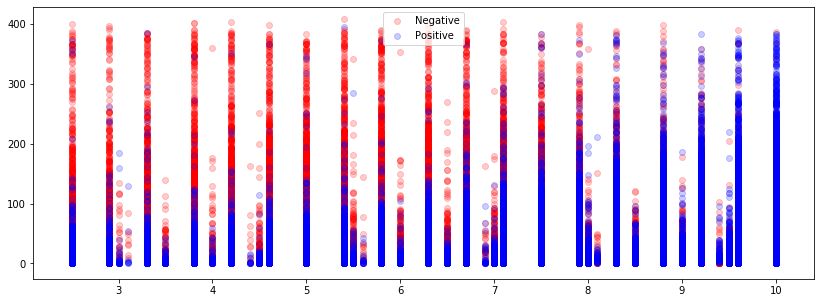

In [35]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
ax.scatter(df['Reviewer_Score'], df['Review_Total_Negative_Word_Counts'], c = 'r', alpha = .2, label = 'Negative')
ax.scatter(df['Reviewer_Score'], df['Review_Total_Positive_Word_Counts'], c = 'b', alpha = .2, label = 'Positive')
ax.legend()

In [36]:
df[['Reviewer_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']].groupby('Reviewer_Score').mean().sort_values(
        ('Review_Total_Negative_Word_Counts'), ascending=False)


,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts
Reviewer_Score,,
3.3,51.938312,7.724747
2.9,51.073002,8.224040
3.8,50.467606,7.393422
4.2,47.289303,7.388813
4.6,45.726122,7.736859
2.5,44.749886,8.207367
5.0,42.019710,8.248635
5.4,41.058996,8.963468
4.0,40.988095,7.797619


### Nationalities
We want to understand if different nationalities tend to get similar scores impacting in the hotel Average_Score postive or negatively. Based on results we are going to create regions to simplify our data.  
Let's take a look at those regions with similar Diff (difference between Reviewer_Score and Average_Score).  
Map below shows those regions that use to score over (red) and below (blue) hotel average.

In [37]:
diff_country = df[['Reviewer_Nationality','Diff']].groupby('Reviewer_Nationality').mean().reset_index()
diff_country.columns = ['name','Diff']
diff_country.name = diff_country.name.apply(lambda x: x[1:-1])

In [38]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [39]:
tmp = world.merge(diff_country, on='name', how='inner')

/root/anaconda3/envs/masterds/lib/python3.7/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/root/anaconda3/envs/masterds/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


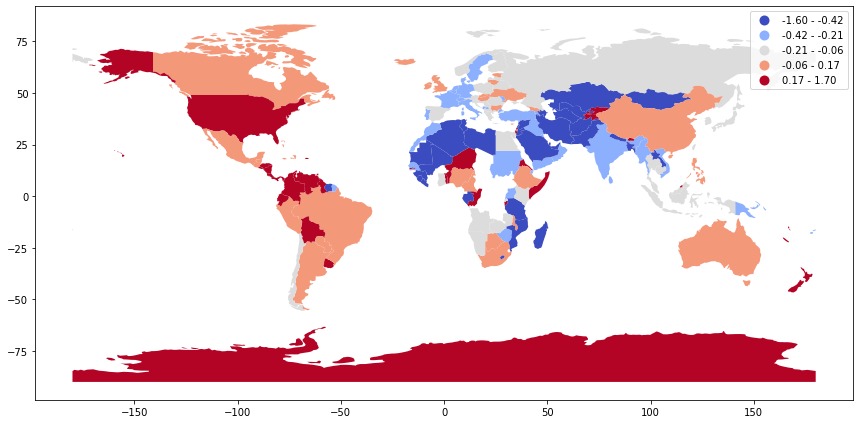

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
#tmp.plot(column='Diff', ax=ax, legend = True, cmap='coolwarm', scheme='box_plot')
tmp.plot(column='Diff', ax=ax, legend = True, cmap='coolwarm', scheme='quantiles')
plt.tight_layout()

#### Let's see which regions generates higher and lower Diff / Reviewer_Score.  
1-Bookings from North America, Oceania and UK & Ireland are those with higher Diff and Reviewer_Score, helping hotels to improve their Average_Score.  
2-However, those bookings from  Middle East, Arabian Countries and Asia & Pacific have a more negative impact in the Average Score despite of getting an average Reviewer_Score between 7.9 and 8.1.   

In [41]:
avg_regions = df[['Diff', 'Nationality_Recode', 'Reviewer_Score'
                  ]].groupby('Nationality_Recode').describe().sort_values(
                      ('Diff', 'mean'), ascending=False)

avg_regions

Diff                                               \
                        count      mean       std  min  25%  50%  75%  max   
Nationality_Recode                                                           
North America         43451.0  0.222103  1.417237 -6.9 -0.4  0.6  1.2  3.6   
Oceania               25065.0  0.141432  1.372926 -6.5 -0.5  0.4  1.1  3.6   
UK & Ireland         262286.0  0.108408  1.492384 -6.9 -0.7  0.5  1.2  3.6   
South/Latin America    5004.0  0.086011  1.490992 -6.8 -0.6  0.5  1.1  3.1   
China                  3400.0 -0.059118  1.553621 -6.7 -0.7  0.3  1.0  3.1   
Sub-Saharian Africa    6041.0 -0.074226  1.512606 -6.4 -0.9  0.2  1.0  3.4   
Eastern Europe        26586.0 -0.084642  1.549289 -7.0 -0.9  0.3  1.0  3.6   
Western Europe        84380.0 -0.197785  1.536222 -6.9 -1.0  0.1  0.9  3.6   
Asia & Pacific        21786.0 -0.267672  1.563509 -6.8 -1.1  0.1  0.9  3.6   
Arab States            2149.0 -0.396138  1.662843 -6.2 -1.3 -0.1  0.9  3.0   
Middle east           35067.0 -0.480879  1.741546 -7.0 -1.4 -0.1  0.8  3.3   

                    Reviewer_Score                                           \
                             count      mean       std  min  25%  50%   75%   
Nationality_Recode                                                            
North America              43451.0  8.742871  1.516778  2.5  7.9  9.2  10.0   
Oceania                    25065.0  8.597339  1.474268  2.5  7.9  9.2   9.6   
UK & Ireland              262286.0  8.483818  1.606209  2.5  7.5  9.2   9.6   
South/Latin America         5004.0  8.486751  1.576156  2.5  7.5  8.8   9.6   
China                       3400.0  8.441147  1.633003  2.5  7.5  8.8   9.6   
Sub-Saharian Africa         6041.0  8.276726  1.628144  2.5  7.5  8.8   9.6   
Eastern Europe             26586.0  8.294877  1.634198  2.5  7.5  8.8   9.6   
Western Europe             84380.0  8.198007  1.657634  2.5  7.5  8.8   9.6   
Asia & Pacific             21786.0  8.119568  1.655964  2.5  7.1  8.3   9.6   
Arab States                 2149.0  7.932899  1.767638  2.5  7.1  8.3   9.5   
Middle east                35067.0  7.914076  1.862609  2.5  6.7  8.3   9.6   

                           
                      max  
Nationality_Recode         
North America        10.0  
Oceania              10.0  
UK & Ireland         10.0  
South/Latin America  10.0  
China                10.0  
Sub-Saharian Africa  10.0  
Eastern Europe       10.0  
Western Europe       10.0  
Asia & Pacific       10.0  
Arab States          10.0  
Middle east          10.0

#### Middle East and Arabian Countries pay more money for an accommodation and European travelers pay less money than the rest of the world. 

In [42]:
df[['Reservation_ADR', 'Nationality_Recode'
    ]].groupby('Nationality_Recode').describe().sort_values(
        ('Reservation_ADR', 'mean'), ascending=False).head(10)

Reservation_ADR                                       \
                              count        mean         std   min    25%   
Nationality_Recode                                                         
Middle east                 33707.0  615.050969  650.496738  39.0  230.0   
Arab States                  2055.0  562.836010  548.238090  47.0  218.0   
North America               42445.0  440.115868  410.964838  39.0  180.0   
Sub-Saharian Africa          5841.0  431.982366  391.762962  42.0  180.0   
South/Latin America          4881.0  431.587789  408.519958  39.0  175.0   
Oceania                     24250.0  401.999216  356.172562  39.0  173.0   
Asia & Pacific              20992.0  401.775486  381.622379  42.0  166.0   
China                        3328.0  388.968450  394.492334  42.0  156.0   
Western Europe              82095.0  312.039990  265.158095  39.0  141.0   
Eastern Europe              26043.0  285.904120  272.015175  39.0  120.0   

                                            
                       50%    75%      max  
Nationality_Recode                          
Middle east          416.0  774.0  11448.0  
Arab States          404.0  721.0   6090.0  
North America        324.0  556.0   7684.0  
Sub-Saharian Africa  321.0  544.0   6069.0  
South/Latin America  312.0  544.0   5022.0  
Oceania              306.0  508.0  10314.0  
Asia & Pacific       296.0  500.0   7155.0  
China                270.0  483.0   5376.0  
Western Europe       242.0  396.0   8008.0  
Eastern Europe       216.0  354.0   7008.0

In [43]:
p = pd.pivot_table(df[['Reservation_ADR', 'Nationality_Recode', 'Room_Recode']],
               values=('Reservation_ADR'), index=['Nationality_Recode'], columns=['Room_Recode'],
               aggfunc=np.mean)
p

Room_Recode,Deluxe,Executive,Other (Standard),Studio,Suite
Nationality_Recode,,,,,
Arab States,702.080960,658.595238,469.168301,731.500000,735.075758
Asia & Pacific,481.158414,533.363190,344.095720,571.752000,564.763770
China,470.852443,597.434783,326.907996,529.052632,570.333333
Eastern Europe,370.145747,352.205379,247.303978,325.091803,434.002999
Middle east,721.927226,816.160777,505.885043,983.567398,836.179016
North America,530.122701,573.931096,374.210014,571.931579,605.054678
Oceania,464.549477,511.017908,352.474461,439.777778,566.206591
South/Latin America,529.449964,628.046784,368.490897,557.491228,588.390977
Sub-Saharian Africa,515.523043,528.366038,365.824436,612.300000,643.933962


#### Relation between Nationality and customer opinion
The number of negative words used in negative reviews is similar in all regions, between 15 and 19 words. However, positive reviews have a wider range of number of words, between 13 and 22.  
It seems to be a tendency to be slighlty more descriptive when the review is negative.This aspect is going to be analyze more in depth in other notebooks.

In [44]:
df['Review_Total_Positive_Word_Counts'].mean()

17.77645820164502

In [45]:
df[['Review_Total_Positive_Word_Counts', 'Nationality_Recode'
    ]].groupby('Nationality_Recode').describe().sort_values(
        ('Review_Total_Positive_Word_Counts', 'mean'), ascending=False).head(10)

Review_Total_Positive_Word_Counts                        \
                                                count       mean        std   
Nationality_Recode                                                            
North America                                 43451.0  22.874571  27.421277   
Oceania                                       25065.0  20.517893  22.868178   
Eastern Europe                                26586.0  17.916874  21.897999   
UK & Ireland                                 262286.0  17.646478  21.061155   
Western Europe                                84380.0  17.472991  21.587164   
Asia & Pacific                                21786.0  16.912054  22.366628   
Sub-Saharian Africa                            6041.0  16.123158  20.294685   
South/Latin America                            5004.0  15.945643  20.191801   
China                                          3400.0  15.923529  17.753171   
Arab States                                    2149.0  13.745928  18.504432   

                                                   
                     min  25%   50%    75%    max  
Nationality_Recode                                 
North America        0.0  7.0  14.0  29.00  395.0  
Oceania              0.0  7.0  14.0  27.00  386.0  
Eastern Europe       0.0  5.0  11.0  23.00  369.0  
UK & Ireland         0.0  6.0  11.0  22.00  384.0  
Western Europe       0.0  5.0  11.0  22.00  382.0  
Asia & Pacific       0.0  5.0  10.0  21.00  375.0  
Sub-Saharian Africa  0.0  5.0  10.0  20.00  314.0  
South/Latin America  0.0  5.0  10.0  20.00  351.0  
China                0.0  5.0  10.0  20.25  259.0  
Arab States          0.0  4.0   8.0  17.00  237.0

In [46]:
df['Review_Total_Negative_Word_Counts'].mean()

18.539450263505888

In [47]:
df[['Review_Total_Negative_Word_Counts', 'Nationality_Recode'
    ]].groupby('Nationality_Recode').describe().sort_values(
        ('Review_Total_Negative_Word_Counts', 'mean'), ascending=False).head(10)

Review_Total_Negative_Word_Counts                        \
                                                count       mean        std   
Nationality_Recode                                                            
Eastern Europe                                26586.0  19.342173  31.629097   
Western Europe                                84380.0  19.328229  30.699601   
UK & Ireland                                 262286.0  18.929386  29.576168   
North America                                 43451.0  18.845596  31.004311   
Oceania                                       25065.0  17.013884  28.270417   
Asia & Pacific                                21786.0  16.955751  29.032617   
Arab States                                    2149.0  16.584923  27.888209   
Middle east                                   35067.0  16.209000  27.070617   
Sub-Saharian Africa                            6041.0  15.824036  24.854950   
South/Latin America                            5004.0  15.691647  27.964517   

                                                  
                     min  25%   50%   75%    max  
Nationality_Recode                                
Eastern Europe       0.0  0.0   9.0  24.0  397.0  
Western Europe       0.0  0.0  10.0  24.0  402.0  
UK & Ireland         0.0  2.0   9.0  24.0  408.0  
North America        0.0  0.0   9.0  24.0  398.0  
Oceania              0.0  0.0   8.0  22.0  393.0  
Asia & Pacific       0.0  2.0   8.0  20.0  392.0  
Arab States          0.0  2.0   7.0  20.0  369.0  
Middle east          0.0  2.0   7.0  19.0  403.0  
Sub-Saharian Africa  0.0  2.0   8.0  20.0  336.0  
South/Latin America  0.0  0.0   7.0  19.0  367.0

### Which cities get better scores? 
Hotels with more reviews provide a more objective score. More reviews and higher score means more credibility and becomes more atractive for customers. We understand that those hotels with at least 100 reviews have enough number of reviews.  

We want to know how many hotels have at least 100 reviews and the result is 1074 out of 1500. It means that most hotels of the 6 cities analyzed have a reliable score. 

In [48]:
sum(df.Hotel_Address.value_counts() > 100)

1074

In [49]:
count_reviews_hotel = pd.DataFrame(
    df.groupby(['Hotel_Name', 'City', 'Average_Score']).apply(lambda x: len(x)).reset_index())

count_reviews_hotel.rename(columns={0: "Reviews"}, inplace=True)

count_reviews_hotel[count_reviews_hotel.Reviews > 100].sort_values('Average_Score', ascending=False).head(10)

,Hotel_Name,City,Average_Score,Reviews
598,Hotel Casa Camper,Barcelona,9.6,301
3,41,London,9.6,103
499,Haymarket Hotel,London,9.6,121
481,H10 Casa Mimosa 4 Sup,Barcelona,9.6,116
773,Hotel The Serras,Barcelona,9.6,213
967,Mercer Hotel Barcelona,Barcelona,9.5,146
494,Ham Yard Hotel,London,9.5,141
1398,The Soho Hotel,London,9.5,157
1472,Waldorf Astoria Amsterdam,Amsterdam,9.5,142
752,Hotel Sacher Wien,Vienna,9.5,130


#### Barcelona and Viena are the cities where hotels have a higher Average Score 

In [50]:
df[['City', 'Average_Score']].groupby('City').describe()

Average_Score                                             
                  count      mean       std  min  25%  50%  75%  max
City                                                                
Amsterdam       57214.0  8.387085  0.519810  6.4  8.1  8.4  8.7  9.5
Barcelona       60149.0  8.522812  0.476509  7.0  8.2  8.5  8.8  9.6
London         262301.0  8.340393  0.588224  6.4  8.0  8.4  8.8  9.6
Milan           37207.0  8.426729  0.503224  5.2  8.1  8.4  8.8  9.4
Paris           59928.0  8.409053  0.529224  6.8  8.1  8.5  8.8  9.8
Vienna          38939.0  8.558034  0.391747  7.7  8.3  8.5  8.8  9.5

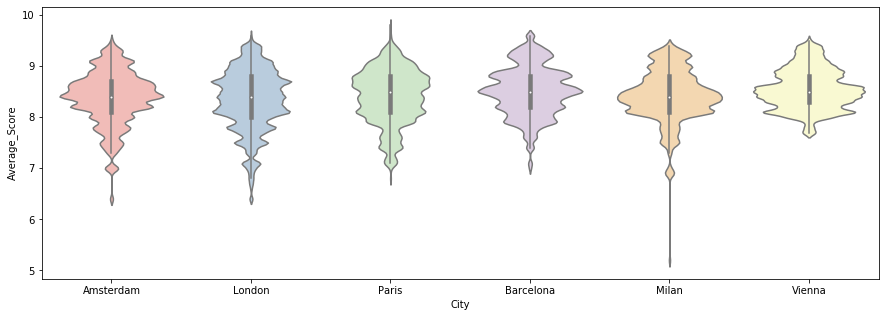

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(ax=ax, x="City", y="Average_Score", data=df, palette="Pastel1")

#### Let's repeat the exercise but only taking into account each hotel once to align hotels with high and low number of reviews

In [52]:
hotel_average = df[['Hotel_Name','City','Average_Score']].groupby(['Hotel_Name','City']).mean().reset_index()

In [53]:
hotel_average[['City', 'Average_Score']].groupby('City').describe()

Average_Score                                                
                  count      mean       std  min  25%   50%    75%  max
City                                                                   
Amsterdam         105.0  8.409524  0.585650  6.4  8.0  8.40  8.800  9.5
Barcelona         211.0  8.496209  0.516845  7.0  8.1  8.50  8.800  9.6
London            400.0  8.464000  0.600796  6.4  8.1  8.50  8.900  9.6
Milan             162.0  8.318519  0.576800  5.2  8.1  8.30  8.600  9.4
Paris             458.0  8.493668  0.526355  6.8  8.2  8.55  8.900  9.8
Vienna            158.0  8.550000  0.414352  7.7  8.2  8.50  8.875  9.5

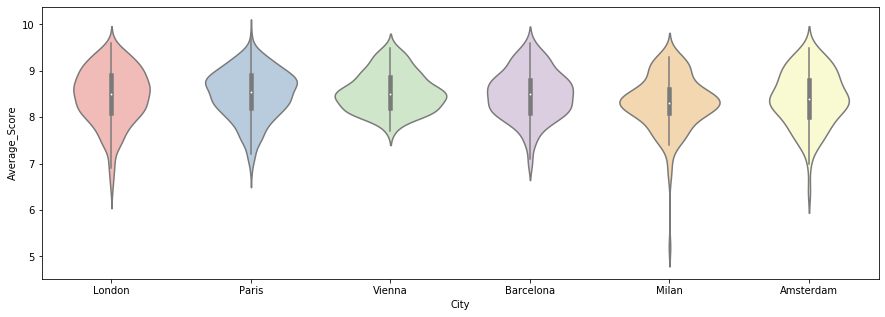

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(ax=ax, x="City", y="Average_Score", data=hotel_average, palette="Pastel1")

#### Paris is the most expensive city. However, it is not the city with  the lowest Reviewer_Score. There are more aspects than price that influence customer's opinion

In [55]:
df[['Reservation_ADR', 'City', 'Reviewer_Score'
    ]].groupby('City').describe().sort_values(
        ('Reservation_ADR', 'mean'), ascending=False)

Reservation_ADR                                                     \
                    count        mean         std   min    25%    50%    75%   
City                                                                           
Paris             57319.0  477.908407  417.007656  62.0  226.0  366.0  592.0   
Amsterdam         57188.0  318.822183  239.223123  47.0  166.0  264.0  405.0   
Barcelona         59602.0  300.383225  222.645797  46.0  158.0  243.0  372.0   
London           250918.0  298.420970  346.801151  53.0  120.0  198.0  336.0   
Milan             35991.0  287.497763  301.071883  48.0  110.0  206.0  348.0   
Vienna            38640.0  279.949508  229.305095  39.0  124.0  228.0  360.0   

                   Reviewer_Score                                          \
               max          count      mean       std  min  25%  50%  75%   
City                                                                        
Paris       7888.0        59928.0  8.420081  1.656137  2.5  7.5  8.8  9.6   
Amsterdam   5520.0        57214.0  8.456311  1.599048  2.5  7.5  8.8  9.6   
Barcelona   3776.0        60149.0  8.554092  1.554202  2.5  7.9  9.2  9.6   
London     11448.0       262301.0  8.324138  1.672136  2.5  7.5  8.8  9.6   
Milan       7008.0        37207.0  8.346722  1.648622  2.5  7.5  8.8  9.6   
Vienna      3444.0        38939.0  8.545047  1.511614  2.5  7.9  8.8  9.6   

                 
            max  
City             
Paris      10.0  
Amsterdam  10.0  
Barcelona  10.0  
London     10.0  
Milan      10.0  
Vienna     10.0

In [56]:
df[['Price', 'City'
    ]].groupby('City').describe().sort_values(
        ('Price', 'count'), ascending=False)

Price                                                          
              count        mean        std   min    25%    50%    75%     max
City                                                                         
London     251006.0  144.461678  79.777122  53.0   99.0  124.0  166.0   896.0
Barcelona   59616.0   97.610457  45.159074  46.0   70.0   85.0  109.0   472.0
Paris       57347.0  175.758645  98.977446  62.0  120.0  153.0  195.0  1105.0
Amsterdam   57214.0  121.480844  55.115830  47.0   83.0  108.0  155.0   502.0
Vienna      38649.0  100.681699  48.293895  39.0   72.0   90.0  115.0   591.0
Milan       36008.0  124.482865  86.287495  48.0   81.0  103.0  131.0   797.0

### Seasonality: time series with Reviewer_Score, Length_N & Reservation_ADR

We find a clear seasonality in the dataset when we analyze the Reviewer_Score, Lenght_N and Reservation_ADR.  
Summer is the period of the year when people stay more days (Length_N) and spend more money (Reservatian_ADR).  
Customers are more demanding giving lower reviews compared to the low season when it get again a higher value.  
We can find some pick events during the year such as Easter and new year's Eve.

#### 1- Reviewer_Score

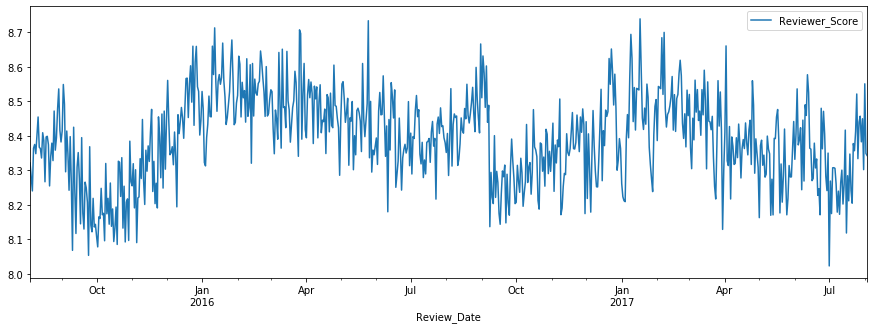

In [57]:
#1 There's a seasonality with lower scores around october and higher values at the beginning of the year
df[['Review_Date','Reviewer_Score']].groupby('Review_Date').mean().plot(figsize=(15,5))

In [58]:
Reviews_Month = df[['Review_Month', 'Review_Year',
                    'Reviewer_Score']].groupby(['Review_Year',
                                                'Review_Month']).count()

In [59]:
Reviews_Month.reset_index(inplace=True)
Reviews_Month

,Review_Year,Review_Month,Reviewer_Score
0,2015,8,19320
1,2015,9,19738
2,2015,10,19486
3,2015,11,18056
4,2015,12,17927
5,2016,1,19510
6,2016,2,18856
7,2016,3,20744
8,2016,4,21481
9,2016,5,23071


#### 2- Length of stay

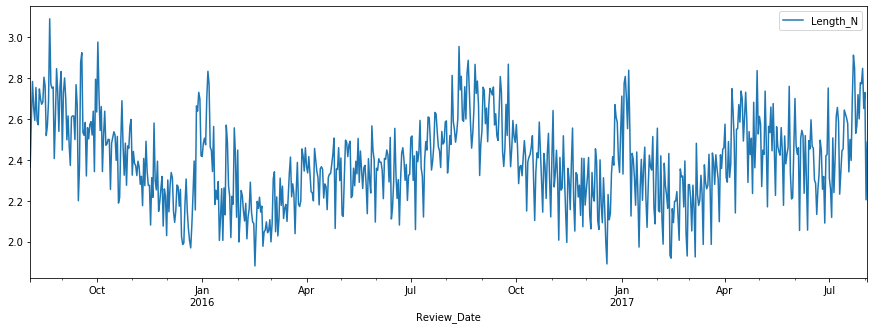

In [60]:
df[['Review_Date','Length_N']].groupby('Review_Date').mean().plot(figsize=(15,5))

In [61]:
pd.crosstab(df['Purpose'], df['Length_N'], normalize = True, margins= True)

Length_N,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,All
Purpose,,,,,,,,,,,,,,,,,,,,,
Business trip,0.077675,0.037218,0.022460,0.012956,0.007200,0.003812,0.002174,0.000763,0.000418,0.000304,...,0.000004,0.000002,0.000004,0.000002,0.000006,0.000006,0.000000,0.000012,0.000000,0.165622
Leisure trip,0.295974,0.223642,0.164485,0.080228,0.033290,0.015034,0.012031,0.004002,0.002028,0.001347,...,0.000014,0.000008,0.000008,0.000010,0.000008,0.000008,0.000006,0.000004,0.000002,0.834378
All,0.373649,0.260860,0.186945,0.093184,0.040491,0.018846,0.014205,0.004765,0.002445,0.001650,...,0.000018,0.000010,0.000012,0.000012,0.000014,0.000014,0.000006,0.000016,0.000002,1.000000


#### 3- Reservation_ADR

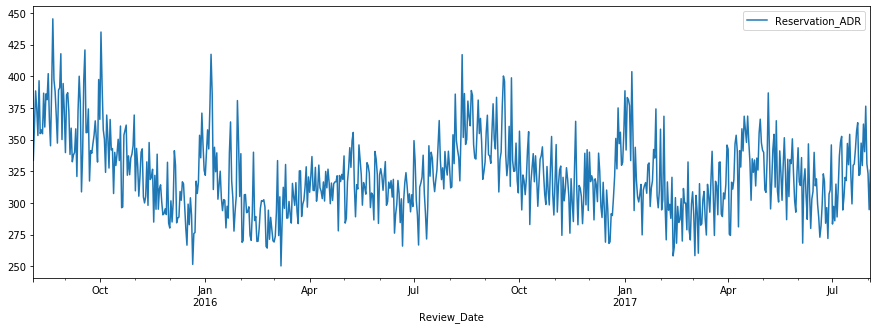

In [62]:
df[['Review_Date','Reservation_ADR']].groupby('Review_Date').mean().plot(figsize=(15,5))

### Customer trends 

#### Trip purpose  

Business Bookers are more demanding than those travelling for Leisure.  
Leisure and Business bookers prefer Barcelona and Vienna.

In [63]:
df[['Reviewer_Score', 'Purpose']].groupby('Purpose').mean()

,Reviewer_Score
Purpose,
Business trip,7.972731
Leisure trip,8.488296


In [64]:
pd.pivot_table(df[['Reviewer_Score', 'Purpose', 'City']],
               values='Reviewer_Score', index=['Purpose'], columns=['City'],
               aggfunc=np.mean)

City,Amsterdam,Barcelona,London,Milan,Paris,Vienna
Purpose,,,,,,
Business trip,8.044043,8.154367,7.867049,7.985181,8.077674,8.292681
Leisure trip,8.526717,8.607587,8.435162,8.446300,8.496723,8.605697


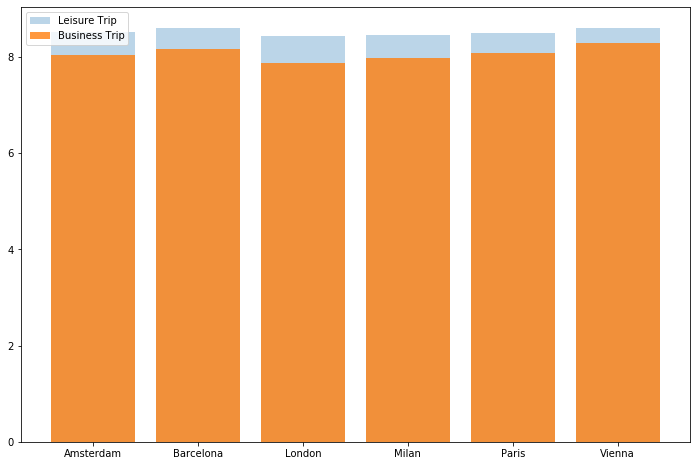

In [65]:
Fig, ax= plt.subplots(1, 1, figsize = (12,8))
plt.bar(['Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris', 'Vienna'], [8.526717, 8.607587, 8.435162, 8.446300, 8.496723, 8.605697], label='Leisure Trip', alpha = 0.3)
plt.bar(['Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris', 'Vienna'], [8.044043, 8.154367, 7.867049, 7.985181, 8.077674, 8.292681], label='Business Trip',alpha = 0.8)
plt.legend()

In [66]:
n = pd.pivot_table(df[['Diff', 'Purpose', 'City']],
               values='Diff', index=['Purpose'], columns=['City'],
               aggfunc=np.mean)
n

City,Amsterdam,Barcelona,London,Milan,Paris,Vienna
Purpose,,,,,,
Business trip,-0.307254,-0.292411,-0.361032,-0.390185,-0.285960,-0.234693
Leisure trip,0.132281,0.072501,0.065445,0.003673,0.075957,0.037401


#### How many days do customer use to stay?
82,09% of the reservations stay between 1-3 nights. 

In [67]:
d = np.cumsum(df.Length_Recode.value_counts()) / len(df.Length)
d

Stayed 1 night      0.375472
Stayed 2 nights     0.635171
Stayed 3 nights     0.820965
Stayed 4 nights     0.913681
Stayed 5 nights     0.954099
Stayed 6 nights     0.973054
Stayed 7 nights     0.987401
Stayed 9+ nights    0.995149
Stayed 8 nights     1.000000
Name: Length_Recode, dtype: float64

/root/anaconda3/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


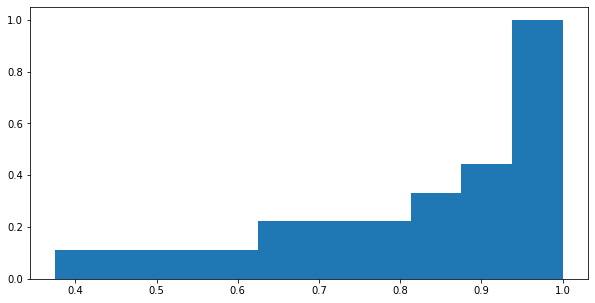

In [68]:
fig, ax=plt.subplots(1, 1, figsize=(10, 5))
ax.hist(d, bins=10, normed=True, cumulative=True)
fig.show()

#### Couple & Solo traveller
Couple and Solo travellers are the most frequet travellers and most of their bookings stay from 1 to 3 nights. However, Solo traveller is the customer that concentrates more reservations for just 1 night: 45,06%. Rest of customer have a better balance between 1-3 nights.

In [69]:
pd.crosstab(df['Whom'], df['Length_Recode'], normalize ='index', margins= True)


Length_Recode,Stayed 1 night,Stayed 2 nights,Stayed 3 nights,Stayed 4 nights,Stayed 5 nights,Stayed 6 nights,Stayed 7 nights,Stayed 8 nights,Stayed 9+ nights
Whom,,,,,,,,,
Couple,0.373560,0.265559,0.193687,0.093264,0.036933,0.015597,0.012699,0.003837,0.004863
Family with older children,0.306805,0.251585,0.205321,0.110934,0.054385,0.027288,0.021481,0.007325,0.014877
Family with young children,0.299336,0.253675,0.203278,0.114824,0.054560,0.028878,0.021814,0.008637,0.014996
Group,0.358117,0.281747,0.198189,0.089063,0.035631,0.016026,0.011408,0.003991,0.005826
Solo traveler,0.450652,0.237689,0.145018,0.076632,0.040131,0.020968,0.014013,0.005012,0.009885
Travelers with friends,0.334111,0.283248,0.205786,0.100793,0.036864,0.016799,0.014466,0.004200,0.003733
All,0.375472,0.259700,0.185794,0.092716,0.040418,0.018955,0.014346,0.004851,0.007748


#### Solo_Traveller, is the most sensitive customer to hotel price? Does it influence on the review score?
Solo_Traveller is the customer that gives lower scores despite of paying less money than the rest of customers. 
However, room cost (Reservation_ADR) for a Solo_Traveller is similar to a couple despite of being just one person in the room. 

In [70]:
df[['Reviewer_Score', 'Reservation_ADR', 'Whom']].groupby('Whom').mean()

,Reviewer_Score,Reservation_ADR
Whom,,
Couple,8.512303,315.731495
Family with older children,8.434673,382.090626
Family with young children,8.303258,382.504772
Group,8.450558,294.234982
Solo traveler,8.129133,292.762246
Travelers with friends,8.498833,287.965501


In [71]:
p = pd.pivot_table(df[['Reservation_ADR', 'Whom', 'Room_Recode', 'Reviewer_Score']],
               values=('Reservation_ADR', 'Reviewer_Score'), index=['Room_Recode'], columns=['Whom'],
               aggfunc=np.mean)
p

Reservation_ADR                             \
Whom                      Couple Family with older children   
Room_Recode                                                   
Deluxe                366.311184                 449.149505   
Executive             361.659345                 518.674051   
Other (Standard)      275.981845                 334.728646   
Studio                381.970477                 417.858491   
Suite                 466.352575                 522.545123   

                                                                       \
Whom             Family with young children       Group Solo traveler   
Room_Recode                                                             
Deluxe                           444.664772  347.524040    349.802294   
Executive                        492.309956  349.238606    374.185764   
Other (Standard)                 328.967918  264.427069    259.373278   
Studio                           447.076789  316.090000    342.704050   
Suite                            518.309425  425.612376    479.576441   

                                        Reviewer_Score  \
Whom             Travelers with friends         Couple   
Room_Recode                                              
Deluxe                       361.883333       8.633318   
Executive                    353.865385       8.421312   
Other (Standard)             254.186751       8.443095   
Studio                       253.476190       8.643808   
Suite                        384.581818       8.678586   

                                                                        \
Whom             Family with older children Family with young children   
Room_Recode                                                              
Deluxe                             8.496122                   8.414880   
Executive                          8.515025                   8.347729   
Other (Standard)                   8.390086                   8.224572   
Studio                             8.719429                   8.583177   
Suite                              8.567382                   8.428451   

                                                                 
Whom                 Group Solo traveler Travelers with friends  
Room_Recode                                                      
Deluxe            8.575881      8.242133               8.532787  
Executive         8.429927      8.099746               8.380000  
Other (Standard)  8.395382      8.075641               8.478699  
Studio            8.736802      8.375076               9.047619  
Suite             8.496340      8.361879               8.614286

#### Based on Reviewer_Score, Barcelona and Viena are their favourite cities and the cheapest for a Solo traveller. It does not happen in other customer profiles 

In [72]:
t= pd.pivot_table(df[['Reviewer_Score','Whom', 'City']],
               values='Reviewer_Score', index=['Whom'], columns=['City'],
               aggfunc=np.mean)
t

City,Amsterdam,Barcelona,London,Milan,Paris,Vienna
Whom,,,,,,
Couple,8.552275,8.648178,8.447384,8.471279,8.565281,8.650314
Family with older children,8.521913,8.582068,8.376403,8.391324,8.441523,8.485800
Family with young children,8.342258,8.426823,8.298068,8.215750,8.202957,8.355580
Group,8.475839,8.611952,8.403229,8.338662,8.428852,8.544990
Solo traveler,8.196450,8.308174,8.014920,8.170207,8.245490,8.446455
Travelers with friends,8.573469,8.575166,8.348173,8.537872,8.461624,8.792647


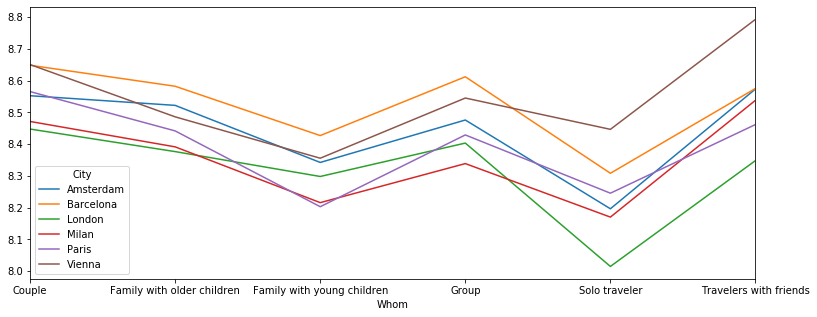

In [73]:
t.plot(figsize=(13,5))

In [74]:
pd.pivot_table(df[['Reservation_ADR','Whom', 'City']],
               values='Reservation_ADR', index=['Whom'], columns=['City'],
               aggfunc=np.mean)

City,Amsterdam,Barcelona,London,Milan,Paris,Vienna
Whom,,,,,,
Couple,331.569529,311.409730,278.642471,300.189761,499.765743,297.399334
Family with older children,350.140905,333.580129,381.851270,308.671960,549.060905,296.307654
Family with young children,346.731553,325.085081,399.734175,302.676911,514.798849,279.667036
Group,296.255404,282.613145,275.343235,270.180120,442.611040,254.040224
Solo traveler,286.414912,249.110828,288.701925,258.571101,400.433317,255.145034
Travelers with friends,277.680307,273.057047,275.015670,249.082609,458.246212,196.599010


In [75]:
s = pd.pivot_table(df[['Reservation_ADR', 'Whom', 'City']],
               values='Reservation_ADR', index=['Whom'], columns=['City'],
               aggfunc=np.mean)

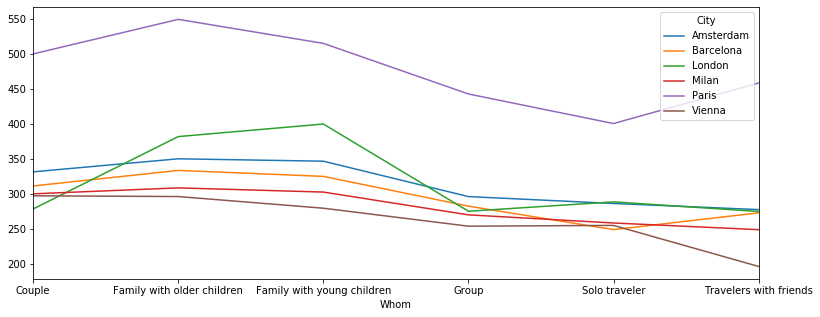

In [76]:
s.plot(figsize=(13,5))

#### Purpose
Main reason for travelling is leisure independently of the customer profile.  
Solo travellers is the only one that combines frequently both, business and Leisure.

In [77]:
pd.crosstab(df['Whom'], df['Purpose'], normalize= 'index', margins= True)

Purpose,Business trip,Leisure trip
Whom,,
Couple,0.057713,0.942287
Family with older children,0.028213,0.971787
Family with young children,0.038455,0.961545
Group,0.113813,0.886187
Solo traveler,0.559181,0.440819
Travelers with friends,0.096310,0.903690
All,0.165640,0.834360


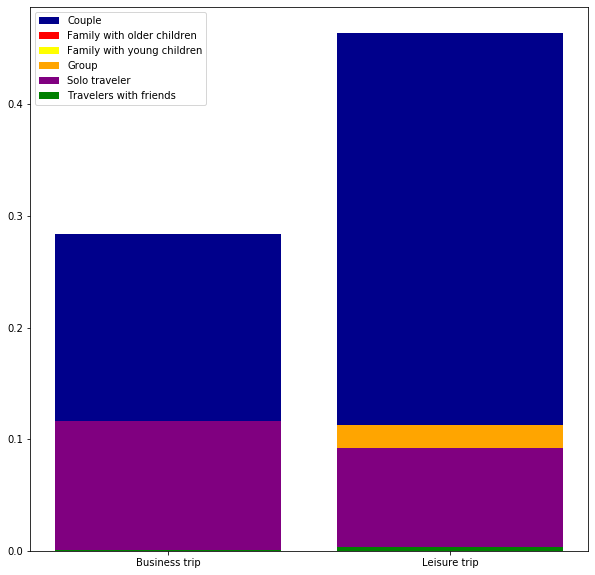

In [78]:
figsize, ax=plt.subplots(1,1, figsize=(10, 10))
plt.bar(['Business trip', 'Leisure trip'],[0.2840, 0.463777], label='Couple', color ='darkblue')
plt.bar(['Business trip', 'Leisure trip'],[0.001432, 0.049323], label='Family with older children', color='red')
plt.bar(['Business trip', 'Leisure trip'],[0.004514, 0.112858], label='Family with young children', color = 'yellow')    
plt.bar(['Business trip', 'Leisure trip'],[0.014497, 0.112880], label='Group', color = 'orange')
plt.bar(['Business trip', 'Leisure trip'],[0.116391, 0.091754], label='Solo traveler', color = 'purple')
plt.bar(['Business trip', 'Leisure trip'],[0.000401, 0.003767], label='Travelers with friends', color= 'green')
plt.legend(loc='upper left')

#### Travelling with Pets

Hotels located in Barcelona are the most valued for customers travelling with pets.


In [79]:
pd.pivot_table(df[['Reviewer_Score', 'Pet', 'City']],
               values='Reviewer_Score', index=['Pet'], columns=['City'],
               aggfunc=np.mean)

City,Amsterdam,Barcelona,London,Milan,Paris,Vienna
Pet,,,,,,
With a pet,8.42377,8.598286,8.287699,8.332796,8.435075,8.447907


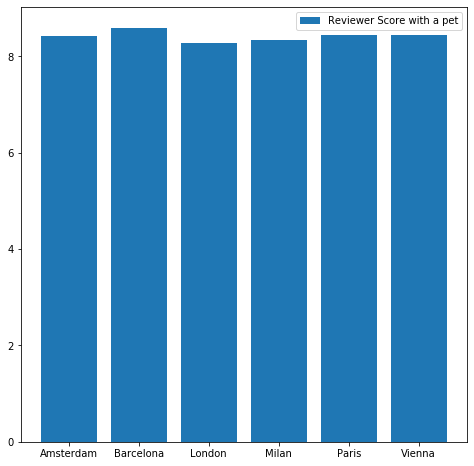

In [80]:
Fig, ax= plt.subplots(1, 1, figsize = (8,8))
plt.bar(['Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris', 'Vienna'], [8.42377, 8.598286, 8.287699, 8.332796, 8.435075, 8.447907], label='Reviewer Score with a pet')
plt.legend()

In [81]:
p = pd.pivot_table(df[['Reservation_ADR', 'Length_Recode', 'Room_Recode', 'Reviewer_Score']],
               values=('Reservation_ADR', 'Reviewer_Score'), index=['Room_Recode'], columns=['Length_Recode'],
               aggfunc=np.mean)
p

Reservation_ADR                                  \
Length_Recode     Stayed 1 night Stayed 2 nights Stayed 3 nights   
Room_Recode                                                        
Deluxe                162.244564      316.616351      470.839952   
Executive             146.716289      301.903504      457.645676   
Other (Standard)      122.158359      240.968189      346.739220   
Studio                138.380428      283.261643      430.674157   
Suite                 166.974287      343.928945      513.083989   

                                                                  \
Length_Recode    Stayed 4 nights Stayed 5 nights Stayed 6 nights   
Room_Recode                                                        
Deluxe                629.162329      811.632870      993.549149   
Executive             622.660953      823.980993      979.953488   
Other (Standard)      460.548044      597.066157      732.210733   
Studio                551.470942      743.262548      843.555556   
Suite                 680.326716      921.197098     1115.033766   

                                                                   \
Length_Recode    Stayed 7 nights Stayed 8 nights Stayed 9+ nights   
Room_Recode                                                         
Deluxe               1148.732246     1333.301587      1832.401390   
Executive            1121.089337     1327.285714      1939.459350   
Other (Standard)      832.087451     1014.179352      1446.119919   
Studio               1269.746154     1466.526316      1651.610526   
Suite                1367.875796     1615.615385      2181.745098   

                 Reviewer_Score                                  \
Length_Recode    Stayed 1 night Stayed 2 nights Stayed 3 nights   
Room_Recode                                                       
Deluxe                 8.588448        8.479258        8.509565   
Executive              8.339355        8.402689        8.382989   
Other (Standard)       8.303398        8.330396        8.384100   
Studio                 8.718036        8.615309        8.547279   
Suite                  8.541407        8.564039        8.564066   

                                                                  \
Length_Recode    Stayed 4 nights Stayed 5 nights Stayed 6 nights   
Room_Recode                                                        
Deluxe                  8.502173        8.415479        8.413443   
Executive               8.394921        8.323814        8.362963   
Other (Standard)        8.357910        8.285806        8.260767   
Studio                  8.528458        8.464751        8.438849   
Suite                   8.625250        8.508541        8.560714   

                                                                   
Length_Recode    Stayed 7 nights Stayed 8 nights Stayed 9+ nights  
Room_Recode                                                        
Deluxe                  8.353668        8.329389         8.155065  
Executive               8.311634        8.035754         7.976834  
Other (Standard)        8.238925        8.155474         8.059128  
Studio                  8.284211        8.615254         8.284536  
Suite                   8.592547        8.402778         8.188050

#### Next steps:

We have analyzed the different qualitative and quantitative variables of the dataset. We mixed variables from the original dataset with new ones created based on our business knowledge.  
We tried to understand the impact of the outlayers, use our business knowledge to confirm customer trends (seasonality, customer profiles, booking characterics) that can have an influence on customer mindset and its customer review.  
Now, we we need to combine all this variables to predict a key Metric: "Diff" (difference between customer review and hotel average Score). It will help hotels to react on time paying special attention on those potential negative reviews.